# Antes de empezar:
- Lee el archivo README.md
- Comenta tanto como puedas y utiliza los recursos (archivo README.md)
- ¡Feliz aprendizaje!

In [4]:
#import os
#!pip3 install statsmodels

In [2]:
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest

from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway
from scipy.stats import sem

# Reto 1 - Explorando los Datos

En este reto, examinaremos todos los salarios de los empleados de la Ciudad de Chicago. Comenzaremos cargando el conjunto de datos y examinando su contenido.

In [3]:
# Run this code:
salaries = pd.read_csv('../data/Current_Employee_Names__Salaries__and_Position_Titles.csv')

salaries.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary        float64
Hourly Rate          float64
dtype: object

Examina el conjunto de datos `salaries` utilizando la función `head` que se muestra a continuación.

In [4]:
# Your code here

salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


# Reto 2 - Pruebas de Hipótesis

En esta sección del laboratorio, vamos a probar si el salario por hora de todos los trabajadores por hora es significativamente diferente de $30/hora. Importa la función correcta para la prueba de una muestra desde scipy y realiza la prueba de hipótesis para un intervalo de confianza de dos lados del 95%.

#### Teoría detrás de las Pruebas de Hipótesis

Cuando realizamos una prueba de hipótesis, estamos investigando si una afirmación sobre una población (en este caso, el salario por hora) es respaldada por los datos de una muestra. Aquí están los pasos clave:

1. **Hipótesis:**
   - Tenemos dos hipótesis:
     - **Hipótesis nula ($H_0$):** El salario por hora es igual a $30 por hora$.
     - **Hipótesis alternativa ($H_1$):** El salario por hora no es igual a $30 por hora$.

2. **Prueba Estadística:**
   - Utilizaremos una prueba t de una muestra, implementada en Python con la función `ttest_1samp` de `scipy.stats`.
   - Esta prueba nos permite comparar la media de nuestra muestra (los salarios por hora que tenemos en nuestros datos) con un valor específico ($30 por hora$ en este caso).

3. **Nivel de Confianza:**
   - Estableceremos un intervalo de confianza del 95%. Esto significa que estamos bastante seguros de nuestras conclusiones si encontramos que el salario por hora es significativamente diferente de $30 por hora$.

4. **Proceso de la Prueba:**
   - Definimos el nivel de significancia (alpha), típicamente establecido en 0.05.
   - Extraemos los datos de salarios por hora del conjunto de datos (eliminando NaN si los hubiera).
   - Aplicamos la prueba de hipótesis utilizando `ttest_1samp(hourly_rates, 30)`, donde `hourly_rates` son los salarios por hora de nuestra muestra y `30` es el valor de comparación.
   - La prueba nos devuelve un valor estadístico t y un valor p.
     - El valor t indica cuánto se desvía la media de nuestros salarios por hora de $30 por hora$ en términos de la variabilidad de la muestra.
     - El valor p nos indica la probabilidad de obtener una muestra como la nuestra si la hipótesis nula ($H_0$: salario = $30 por hora$) fuera verdadera.

5. **Interpretación de los Resultados:**
   - Comparamos el valor p obtenido con nuestro nivel de significancia (alpha).
   - Si el valor p es menor que alpha, rechazamos la hipótesis nula ($H_0$) y concluimos que hay evidencia suficiente para afirmar que el salario por hora es significativamente diferente de $30 por hora$.
   - Si el valor p es mayor que alpha, no tenemos suficiente evidencia para rechazar la hipótesis nula y concluimos que no hay diferencia significativa en el salario por hora.

Este proceso nos permite utilizar datos muestrales para hacer inferencias sobre la población más amplia de trabajadores por hora en Chicago en términos de sus salarios por hora.

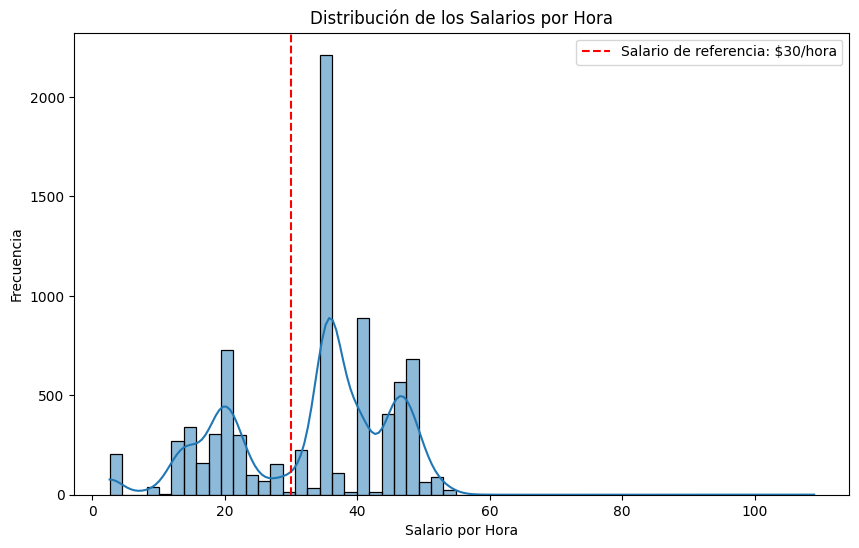

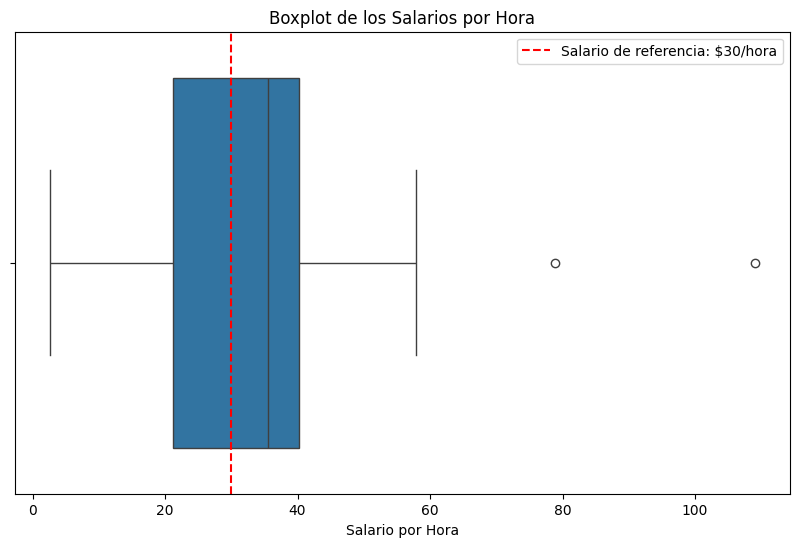

Prueba de hipótesis de una muestra:
Estadístico t: 20.6198057854942
Valor p: 4.3230240486229894e-92
Podemos rechazar la hipótesis nula (H0). El salario por hora es significativamente diferente de $30/hora.


In [16]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp


# Definir el nivel de significancia (alpha)
alpha = 0.05

# Extraer los salarios por hora del DataFrame (suponiendo que 'Hourly Rate' contiene estos datos)
hourly_rates = salaries['Hourly Rate'].dropna()  # Eliminar NaN si los hubiera

# Realizar la prueba de hipótesis
t_statistic, p_value = ttest_1samp(hourly_rates, 30)

# Graficar el histograma de los salarios por hora
plt.figure(figsize=(10, 6))
sns.histplot(hourly_rates, kde=True)
plt.axvline(30, color='r', linestyle='--', label='Salario de referencia: $30/hora')
plt.title('Distribución de los Salarios por Hora')
plt.xlabel('Salario por Hora')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Graficar el boxplot de los salarios por hora
plt.figure(figsize=(10, 6))
sns.boxplot(x=hourly_rates)
plt.axvline(30, color='r', linestyle='--', label='Salario de referencia: $30/hora')
plt.title('Boxplot de los Salarios por Hora')
plt.xlabel('Salario por Hora')
plt.legend()
plt.show()

# Imprimir los resultados
print("Prueba de hipótesis de una muestra:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

# Comparar el valor p con el nivel de significancia
if p_value < alpha:
    print("Podemos rechazar la hipótesis nula (H0). El salario por hora es significativamente diferente de $30/hora.")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay evidencia suficiente para concluir que el salario por hora difiere significativamente de $30/hora.")


# Reto 3 - Construyendo Intervalos de Confianza

Aunque probar nuestra hipótesis es una excelente manera de obtener evidencia empírica para aceptar o rechazar la hipótesis, otra forma de recopilar evidencia es creando un intervalo de confianza. Un intervalo de confianza nos brinda información sobre la media verdadera de la población. Por lo tanto, para un intervalo de confianza del 95%, estamos seguros en un 95% de que la media de la población se encuentra dentro del intervalo de confianza.

Para leer más sobre los intervalos de confianza, haz clic [aquí](https://es.wikipedia.org/wiki/Intervalo_de_confianza).

En la celda a continuación, construiremos un intervalo de confianza del 95% para el salario por hora medio de todos los trabajadores por hora.

El intervalo de confianza se calcula en SciPy utilizando la función `t.interval`. Puedes leer más sobre esta función [aquí](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

Para calcular el intervalo de confianza del salario por hora, usa 0.95 para el nivel de confianza, el número de filas - 1 para los grados de libertad, la media de la muestra para el parámetro de ubicación y el error estándar para la escala. El error estándar se puede calcular utilizando [esta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) función en SciPy.

#### Teoría detrás de la Construcción de Intervalos de Confianza

Un intervalo de confianza es una herramienta estadística que nos proporciona un rango de valores en el cual es probable que se encuentre un parámetro de interés de la población, como la media.

1. **Importancia del Intervalo de Confianza:**
   - Mientras que las pruebas de hipótesis nos ayudan a evaluar afirmaciones específicas sobre los parámetros poblacionales, los intervalos de confianza nos ofrecen una estimación de dónde podría estar ese parámetro con cierto grado de certeza.

2. **Construcción del Intervalo de Confianza:**
   - Para construir un intervalo de confianza del 95% para el salario por hora medio:
     - **Nivel de Confianza del 95%:** Esto significa que si repitiéramos este proceso muchas veces, esperaríamos que el 95% de los intervalos calculados contengan la verdadera media poblacional.
     - **Cálculo del Intervalo:**
       - Utilizamos la función `t.interval` de SciPy, que calcula el intervalo de confianza utilizando la distribución t de Student.
       - Parámetros necesarios:
         - Nivel de confianza de 0.95.
         - Grados de libertad, generalmente el número de observaciones menos uno.
         - Media de la muestra, que es el parámetro de ubicación.
         - Error estándar, que se calcula utilizando la función `sem` de SciPy.

3. **Interpretación del Intervalo de Confianza:**
   - Una vez calculado el intervalo de confianza, podemos afirmar con un 95% de confianza que la media verdadera del salario por hora de todos los trabajadores por hora en la Ciudad de Chicago se encuentra dentro de este intervalo.

4. **Aplicación Práctica:**
   - Este intervalo nos proporciona una estimación más completa y robusta que una simple prueba de hipótesis, ya que nos permite cuantificar la incertidumbre asociada con nuestra estimación de la media poblacional.

En resumen, construir un intervalo de confianza del 95% nos ayuda a entender mejor el rango plausible de la media del salario por hora para todos los trabajadores por hora en Chicago, basado en nuestros datos muestrales.

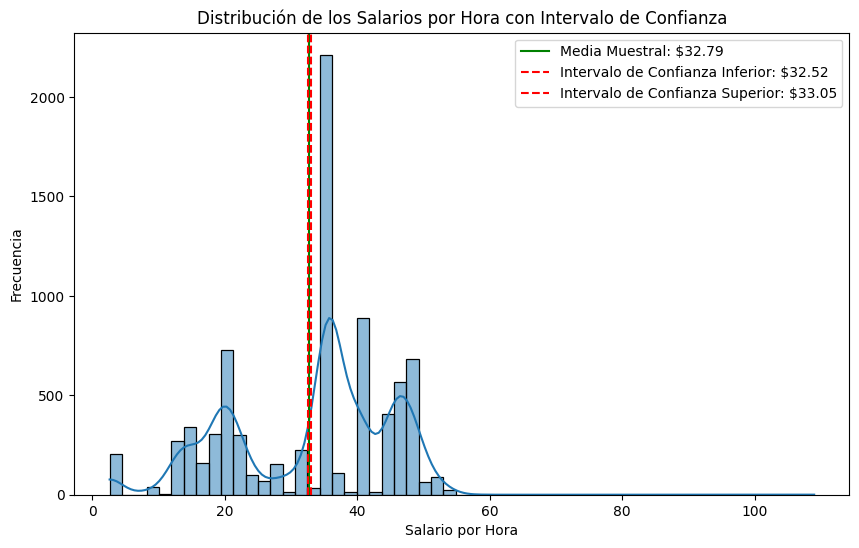

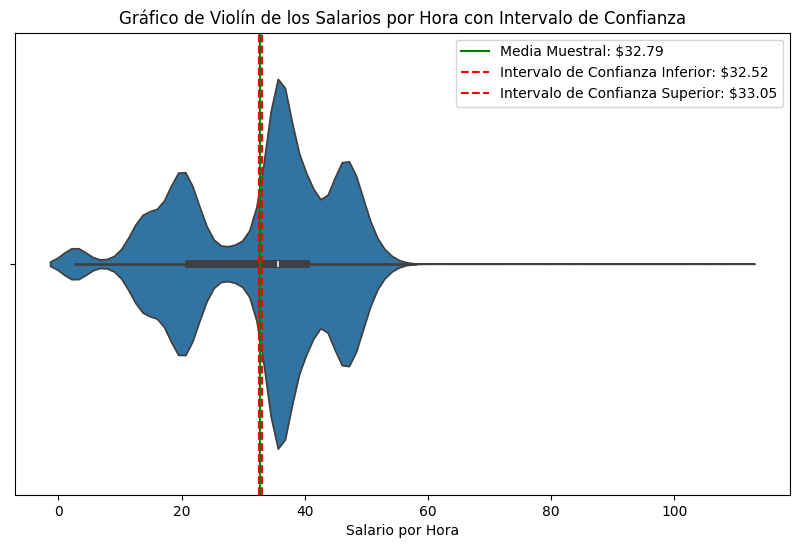

Intervalo de confianza del 95.0% para el salario por hora medio:
($32.52, $33.05)


In [35]:
# Your code here

# Calcular la media muestral y el error estándar
mean_hourly_rate = np.mean(hourly_rates)
std_error_hourly_rate = sem(hourly_rates)

# Calcular el intervalo de confianza del 95%
confidence_level = 0.95
degrees_freedom = len(hourly_rates) - 1
interval = t.interval(confidence_level, degrees_freedom, loc=mean_hourly_rate, scale=std_error_hourly_rate)

# Graficar el histograma de los salarios por hora
plt.figure(figsize=(10, 6))
sns.histplot(hourly_rates, kde=True)
plt.axvline(mean_hourly_rate, color='g', linestyle='-', label=f'Media Muestral: ${mean_hourly_rate:.2f}')
plt.axvline(interval[0], color='r', linestyle='--', label=f'Intervalo de Confianza Inferior: ${interval[0]:.2f}')
plt.axvline(interval[1], color='r', linestyle='--', label=f'Intervalo de Confianza Superior: ${interval[1]:.2f}')
plt.title('Distribución de los Salarios por Hora con Intervalo de Confianza')
plt.xlabel('Salario por Hora')
plt.ylabel('Frecuencia')
#plt.xlim(30, 35)
plt.legend()
plt.show()

# Graficar el gráfico de violín de los salarios por hora
plt.figure(figsize=(10, 6))
sns.violinplot(x=hourly_rates)
plt.axvline(mean_hourly_rate, color='g', linestyle='-', label=f'Media Muestral: ${mean_hourly_rate:.2f}')
plt.axvline(interval[0], color='r', linestyle='--', label=f'Intervalo de Confianza Inferior: ${interval[0]:.2f}')
plt.axvline(interval[1], color='r', linestyle='--', label=f'Intervalo de Confianza Superior: ${interval[1]:.2f}')
plt.title('Gráfico de Violín de los Salarios por Hora con Intervalo de Confianza')
plt.xlabel('Salario por Hora')
#plt.xlim(30, 35)
plt.legend()
plt.show()

# Imprimir el intervalo de confianza
print(f"Intervalo de confianza del {confidence_level*100}% para el salario por hora medio:")
print(f"(${interval[0]:.2f}, ${interval[1]:.2f})")


# Reto 4 - Pruebas de Hipótesis de Proporciones

Otro tipo de prueba de una muestra es una prueba de hipótesis de proporciones. En esta prueba, examinamos si la proporción de un grupo en nuestra muestra es significativamente diferente de una fracción.

Puedes leer más sobre las pruebas de proporción de una muestra [aquí](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

En la celda a continuación, utiliza la función `proportions_ztest` de `statsmodels` para realizar una prueba de hipótesis que determinará si el número de trabajadores por hora en la Ciudad de Chicago es significativamente diferente del 25% en el nivel de confianza del 95%.

#### Teoría detrás de las Pruebas de Hipótesis de Proporciones

Las pruebas de hipótesis de proporciones son utilizadas cuando queremos evaluar si la proporción de un grupo en nuestra muestra difiere significativamente de una fracción específica.

1. **Hipótesis:**
   - Establecemos dos hipótesis:
     - **Hipótesis nula ($H_0$):** La proporción de trabajadores por hora es igual al 25%.
     - **Hipótesis alternativa ($H_1$):** La proporción de trabajadores por hora no es igual al 25%.

2. **Prueba Estadística:**
   - Utilizaremos la función `proportions_ztest` de `statsmodels.stats.proportion`.
   - Esta prueba nos permite comparar la proporción observada en nuestra muestra con una proporción específica (en este caso, 0.25 o 25%).

3. **Nivel de Confianza:**
   - Establecemos un nivel de confianza del 95%, lo que significa que si encontramos que la proporción de trabajadores por hora es significativamente diferente de 25%, podemos confiar en nuestra conclusión el 95% del tiempo.

4. **Proceso de la Prueba:**
   - La función `proportions_ztest` calculará automáticamente el estadístico z y el valor p para nosotros.
     - El estadístico z mide cuántos errores estándar está la proporción de nuestra muestra lejos de la proporción hipotética de 25%.
     - El valor p nos indica la probabilidad de obtener una muestra como la nuestra si la hipótesis nula ($H_0$: proporción = 0.25) fuera verdadera.

5. **Interpretación de los Resultados:**
   - Comparamos el valor p obtenido con nuestro nivel de significancia (generalmente 0.05 para un nivel de confianza del 95%).
   - Si el valor p es menor que nuestro nivel de significancia, rechazamos la hipótesis nula ($H_0$) y concluimos que la proporción de trabajadores por hora es significativamente diferente del 25%.
   - Si el valor p es mayor que nuestro nivel de significancia, no tenemos suficiente evidencia para rechazar la hipótesis nula y concluimos que no hay diferencia significativa en la proporción de trabajadores por hora.

Este proceso nos permite evaluar si la proporción de trabajadores por hora en Chicago es diferente del 25%, utilizando datos muestrales y una prueba estadística adecuada.

In [22]:
from statsmodels.stats.proportion import proportions_ztest

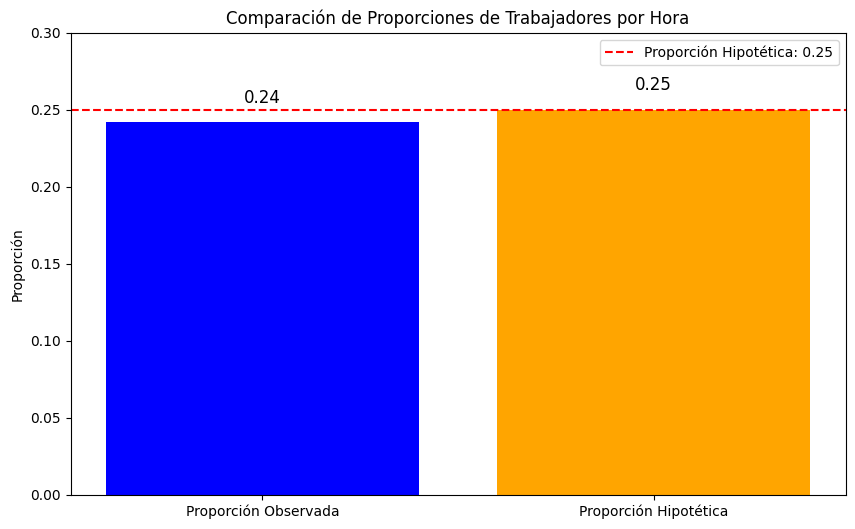

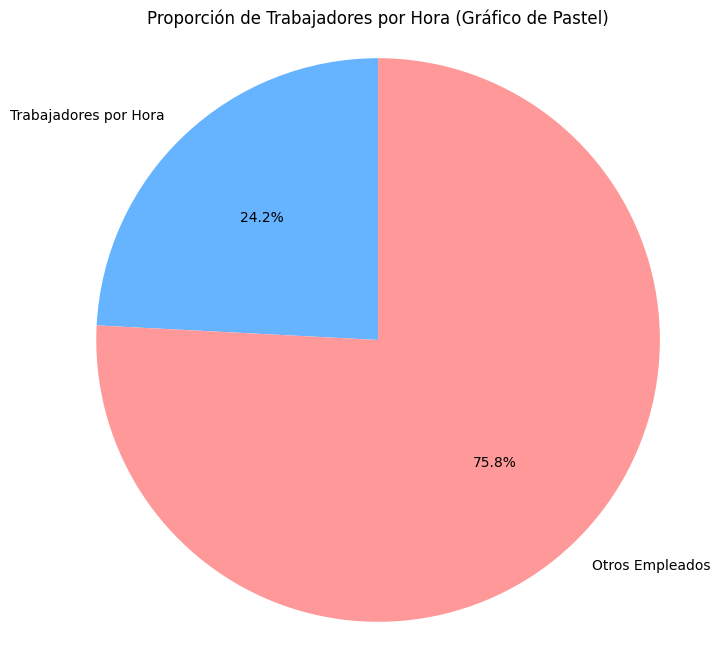

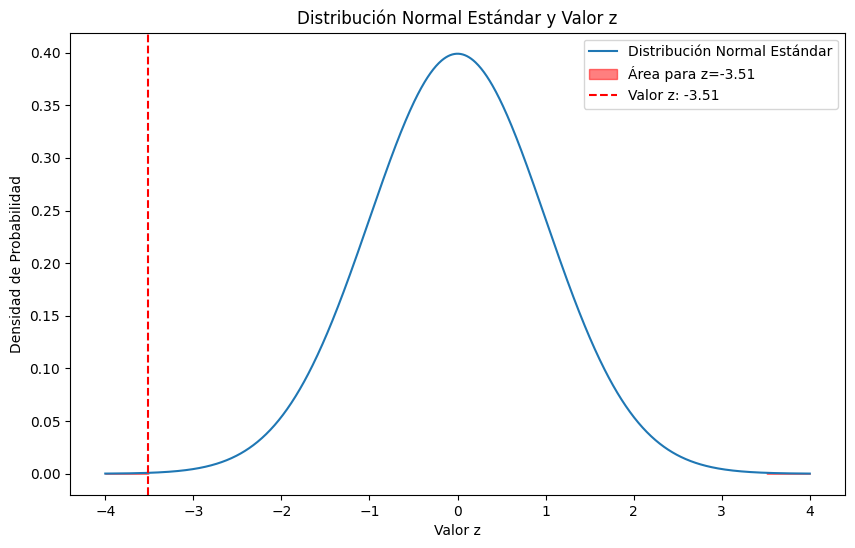

Prueba de hipótesis de proporciones:
Valor z: -3.5099964213703005
Valor p: 0.0004481127249057967
Podemos rechazar la hipótesis nula (H0). La proporción de trabajadores por hora es significativamente diferente del 25%.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

# Supongamos que 'salaries' es el DataFrame que contiene los datos de los empleados en la Ciudad de Chicago
# Crear un DataFrame de ejemplo (eliminar si ya tienes el DataFrame 'salaries')
# salaries = pd.DataFrame({'Salary or Hourly': np.random.choice(['Hourly', 'Salary'], 1000, p=[0.3, 0.7])})

# Definir los parámetros de la prueba
count = len(salaries[salaries['Salary or Hourly'] == 'Hourly'])  # Número de trabajadores por hora
nobs = len(salaries)  # Número total de empleados

# Definir la proporción hipotética bajo la hipótesis nula
p_null = 0.25

# Realizar la prueba de hipótesis de proporciones
stat, p_value = proportions_ztest(count, nobs, p_null)

# Calcular la proporción observada
p_obs = count / nobs

# Gráfico de barras para comparar proporciones
plt.figure(figsize=(10, 6))
bars = plt.bar(['Proporción Observada', 'Proporción Hipotética'], [p_obs, p_null], color=['blue', 'orange'])
plt.title('Comparación de Proporciones de Trabajadores por Hora')
plt.ylabel('Proporción')
plt.ylim(0, 0.3)  # Ajustar el límite y para mejor visualización
plt.axhline(y=p_null, color='r', linestyle='--', label='Proporción Hipotética: 0.25')
plt.text(0, p_obs + 0.01, f'{p_obs:.2f}', ha='center', va='bottom', fontsize=12, color='black')  # Mostrar valor de la proporción observada
plt.text(1, p_null + 0.01, f'{p_null:.2f}', ha='center', va='bottom', fontsize=12, color='black')  # Mostrar valor de la proporción hipotética
plt.legend()
plt.show()

# Gráfico de pastel para visualizar proporciones
plt.figure(figsize=(8, 8))
labels = ['Trabajadores por Hora', 'Otros Empleados']
sizes = [count, nobs - count]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Trabajadores por Hora (Gráfico de Pastel)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Gráfico de distribución normal con valor z
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)
plt.plot(x, y, label='Distribución Normal Estándar')
plt.fill_between(x, 0, y, where=(x >= abs(stat)), color='red', alpha=0.5, label=f'Área para z={stat:.2f}')
plt.fill_between(x, 0, y, where=(x <= -abs(stat)), color='red', alpha=0.5)
plt.axvline(stat, color='r', linestyle='--', label=f'Valor z: {stat:.2f}')
plt.title('Distribución Normal Estándar y Valor z')
plt.xlabel('Valor z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

# Imprimir los resultados de la prueba de hipótesis
print("Prueba de hipótesis de proporciones:")
print(f"Valor z: {stat}")
print(f"Valor p: {p_value}")

# Comparar el valor p con el nivel de significancia (alpha)
alpha = 0.05
if p_value < alpha:
    print("Podemos rechazar la hipótesis nula (H0). La proporción de trabajadores por hora es significativamente diferente del 25%.")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay suficiente evidencia para concluir que la proporción de trabajadores por hora difiere significativamente del 25%.")
